# TD4 Python

# Exercise 1 [Regex]

## 1. Import the re module :

In [1]:
import re

## 2. Write a regexp to extract the score, Cristiano’s age, number of goals and the number of selections from the following text:

In [2]:
texte ="Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."
score = re.findall(r"\d+-\d+", texte)
print("Le score est de ", score, " points")

age = re.findall(r"\d+ ans", texte)
print("Cristiano a ", age)

goal = re.findall(r"\d+ buts", texte)
print("Il y a eu ", goal)

selection = re.findall(r"\d+ matchs", texte)
print("Il y a eu ", selection)


Le score est de  ['3-0']  points
Cristiano a  ['36 ans']
Il y a eu  ['112 buts']
Il y a eu  ['181 matchs']


## 3. Write a regexp to get prices from the following text:

In [3]:
texte2 = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande"
re.findall(r"\d+ euros", texte2)

['230 euros', '900 euros']

## 4. Write a regexp to get reduction values, along with promo code:

In [4]:
texte3="- 40% sur tous les réservoirs d'essence et collecteurs d'échappement (achats internet uniquement) avec le code promo : PRINTEMPS \n- 40% sur tous les carénages plastique (achats internet uniquement) avec le code promo : CARENAGE40 \n - 50% sur toutes les rampes d'injection (achats internet uniquement) avec le code promo : INJECTION50"
pourcentage = re.findall(r"..%", texte3)
code_promo =re.findall(r"code promo : \w+", texte3)
dico = dict(zip(code_promo, pourcentage))
print(dico)

{'code promo : PRINTEMPS': '40%', 'code promo : CARENAGE40': '40%', 'code promo : INJECTION50': '50%'}


# Exercise 2 [BeautifulSoup]

### BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.


In [5]:
from bs4 import BeautifulSoup

In [6]:
import requests
import html5lib

## 1. Query the website and return the html into the variable 'page'.
## 2. Parse the html using beautiful soup and store in variable 'Soup'.


In [7]:
url = "https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

## 3. Save the Soup variable output into an HTML file and open it using web browser. What do you remark?

In [8]:
with open("tst.html", "w") as f:
    f.write(str(soup))

### C'est un fichier html contenant beaucoup de tags < a >, < p >, etc

## 4. In 2006, the counter reached its highest level. Extract this information from the webpage.
## Extract the same information using the selector then using the HTML tag.

In [9]:
for p in soup.select("p"):
    if "a atteint son niveau le plus haut" in p.get_text():
        print(p)

<p>C'est en 2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €.</p>


## 5. Retrieve the publication date from the webpage, using the CSS classes.

In [10]:
date_publication= soup.find(class_="datePublication")
date_publication

date_publication2= soup.find("span",{"class":"datePublication"}).get_text()
match = re.search(r'(\d+/\d+/\d+)', date_publication2)
match.group(0)

'04/07/2021'

## 6. Retrieve the number of days remaining until the next telethon from the webpage.

In [11]:
jour= soup.find("span", {"class": "hidden"}).get_text()
jour2 =re.search(r'\d+', jour)
jour2.group(0)

'23'

## 7. Retrieve all hidden inputs from the webpage.

In [12]:
for hidden in soup.select('input[type="hidden"]'):
    print(hidden['value'])

print("\nTaille: ",len(soup.select('input[type="hidden"]')))



form-_GOi-4Y0uXs25epG5efrQh4w636Gxq9YdrDeTMvsGLg
apachesolr_panels_search_block
66
https://don.telethon.fr/?idm=30278&ido=1080&fdd_type=DF&bandeau=A&compteur=1&utm_source=afm_telethon&utm_medium=relais_actu&utm_campaign=afm_telethon_relais_actu_fidelisation&utm_content=cta_donner
form-3n-cdi__LqbSHdp995GmghcRUmUWYAkZHkM4eamIu6U
afm_specifics_donation_private_form

Taille:  6


## 8. Find the number of tables defined in the soup. Retrieve this table from the webpage.

In [44]:
table = soup.findAll("table")[0]
table

<table border="0" style="width: 1096px; height: 1035px;"><tbody><tr><td class="txt-petit">Année</td>
<td class="txt-petit">Parrain</td>
<td class="txt-petit">
<p>Montant collecté</p>
</td>
</tr><tr><td class="fdLigneTableau">1987</td>
<td class="fdLigneTableau">Jerry LEWIS</td>
<td class="fdLigneTableau">29 650 000 €</td>
</tr><tr><td>1988</td>
<td>Mireille MATHIEU</td>
<td>28 490 000 €</td>
</tr><tr><td class="fdLigneTableau">1989</td>
<td class="fdLigneTableau">Alain DELON</td>
<td class="fdLigneTableau">40 930 000 €</td>
</tr><tr><td>1990</td>
<td>Claudia CARDINALE</td>
<td>46 510 000 €</td>
</tr><tr><td class="fdLigneTableau">1991</td>
<td class="fdLigneTableau">Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI</td>
<td class="fdLigneTableau">38 650 000 €</td>
</tr><tr><td>1992</td>
<td>Barbara HENDRICKS</td>
<td>47 870 000 €</td>
</tr><tr><td class="fdLigneTableau">1993</td>
<td class="fdLigneTableau">Michel SARDOU</td>
<td class="fdLigneTableau">55 600 000 €</td>
</tr><tr><td>1994</

In [45]:
len(table)

1

## 9. Retrieve the items from this table. Create a python dataframe representing this table

In [18]:
import pandas as pd

#### tr => TableRow
#### td => TableData

### Version 1

In [59]:
rows = []
for tr in table.find_all('tr'):
    row=[]
    for td in tr.find_all('td'):
        row.append(td.get_text().strip())
    rows.append(row)

df1= pd.DataFrame(rows)
df1.head()

,0,1,2
0,Année,Parrain,Montant collecté
1,1987,Jerry LEWIS,29 650 000 €
2,1988,Mireille MATHIEU,28 490 000 €
3,1989,Alain DELON,40 930 000 €
4,1990,Claudia CARDINALE,46 510 000 €


### Version 2

In [60]:
# For a given row, return a list of all the data
def getRowData(tr):
    return [td.get_text(strip=True) for td in tr.find_all('td')]

rows = []
trs = table.findAll("tr") # Get table rows
for tr in trs: # For each row
    rows.append(getRowData(tr)) # Get data

df2 = pd.DataFrame(rows[1:], columns=rows[0]) # Create DF with specifiing colums
df2["Année"] = df["Année"].astype(int)
df2["Montant collecté"] = pd.to_numeric(df2["Montant collecté"].str.replace(" ", "").str.replace("€", "").str.strip())

print(df2.dtypes)
df2.head()

Année                int32
Parrain             object
Montant collecté     int64
dtype: object


,Année,Parrain,Montant collecté
0,1987,Jerry LEWIS,29650000
1,1988,Mireille MATHIEU,28490000
2,1989,Alain DELON,40930000
3,1990,Claudia CARDINALE,46510000
4,1991,"Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI",38650000


### Version 3

In [64]:
col_names = [td.get_text().strip() for td in soup.select("tr td")[:3]]
elements = [td.get_text() for td in soup.select("tr td")[3:]]
year = [td for td in elements[0::3]]
referrer = [td for td in elements[1::3]]
amount_collected = [td for td in elements[2::3]]

df3= pd.DataFrame(dict(zip(col_names,[year, referrer, amount_collected])))
df3.head()

,Année,Parrain,Montant collecté
0,1987,Jerry LEWIS,29 650 000 €
1,1988,Mireille MATHIEU,28 490 000 €
2,1989,Alain DELON,40 930 000 €
3,1990,Claudia CARDINALE,46 510 000 €
4,1991,"Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI",38 650 000 €


## 10 & 11. Visualize the evolution of the amount collected per year. Mark the maximum and minimum of the evolution with respectively red and green colors.

In [62]:
import matplotlib.pyplot as plt

### Version 1

<AxesSubplot:title={'center':'Montants collectés au fil du temps'}, xlabel='Année', ylabel='Montant'>

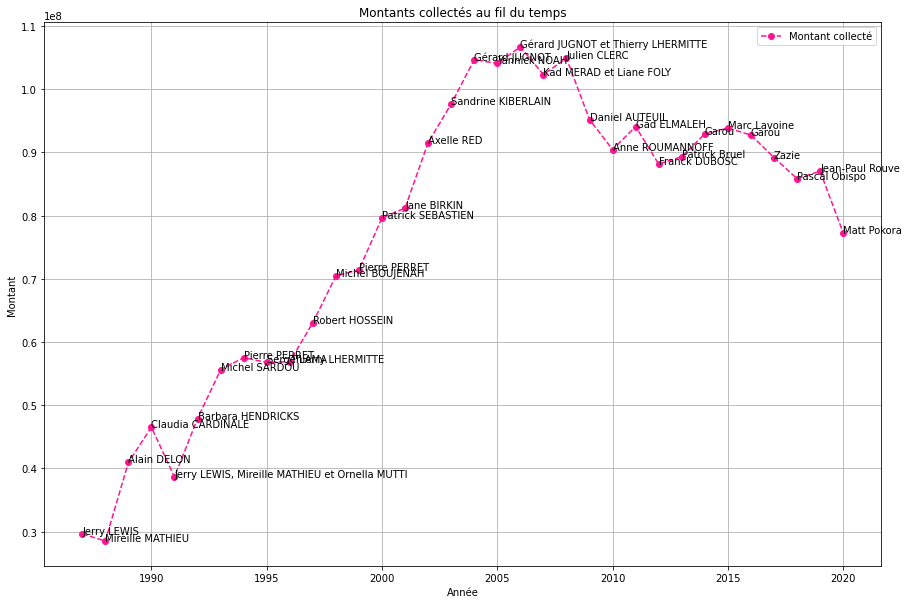

In [109]:
fig, ax= plt.subplots(figsize=(15,10))

a = pd.concat({'x': df2["Année"], 'y': df2["Montant collecté"], 'val': df2["Parrain"]}, axis=1)
for i, point in a.iterrows():
    ax.text(point['x'], point['y'], point['val'])

df2.plot("Année", "Montant collecté", style='--o', title="Montants collectés au fil du temps", ylabel="Montant", color='deeppink', grid=True,ax=ax)


## Version 2

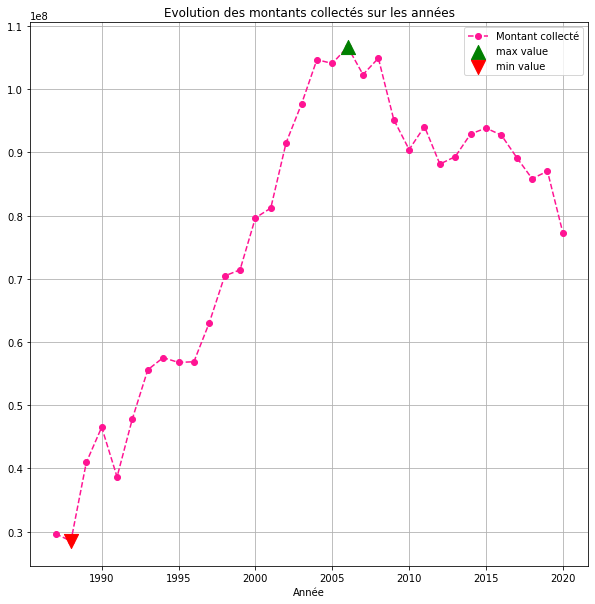

In [106]:
plot_df= df2.set_index('Année')['Montant collecté']
ax = plot_df.plot(kind='line', figsize=[10,10], style ='--o', color= "deeppink", title = 'Evolution des montants collectés sur les années', grid= True)

ax.scatter(
    plot_df.idxmax(),
    plot_df.max(),
    color= 'green',
    marker = '^',
    s = 200,
    zorder = 3,
    label = "max value"
)
ax.scatter(
    plot_df.idxmin(),
    plot_df.min(),
    color= 'red',
    marker = 'v',
    s = 200,
    zorder = 3,
    label = "min value"
)

ax.legend()

# Exercice 3

## 1. Store the html table in a dataframe.

In [68]:
page = requests.get("https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html")
soup = BeautifulSoup(page.content, "html.parser")

tables = soup.findAll("table")
print(tables)
print(len(tables))

[<table class="tableau-metadonnees-light">
<tr>
<th>
<span class="hide-on-small-only">Département 75</span>
<span class="hide-on-med-and-up">Dept. 75</span>
</th>
<td>Paris</td>
</tr>
<tr>
<th>Altitude</th>
<td>75 mètres</td>
</tr>
<tr>
<th>Coordonnées</th>
<td>
                        48,82°N | 2,34°E                    </td>
</tr>
<tr><!-- temps réel-->
<th><span class="tripsy-trigger" title="Il s'agit des archives horaires disponibles sur Infoclimat.">Début des archives</span></th>
<td>
                        9 décembre  1983                    </td>
</tr>
<tr>
<th>Fuseau horaire</th>
<td>Europe/Paris</td>
</tr>
<tr>
<th>Type de station</th>
<td>
                        Météo-France                    </td>
</tr>
</table>, <table class="resptable" id="duplicate-resptable" style="z-index:2000; position: fixed; display:none; top:0; left:0; right:0">
<thead style="position:relative;"></thead>
</table>, <table class="resptable" id="resptable-releves">
<thead>
<tr>
<th style="">
       

In [69]:
def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row

    for tr in trs: # for every table row
        currentRow = [td.get_text(strip=True) for td in tr.find_all('th')]
        currentRow.extend([td.get_text(strip=True) for td in tr.find_all('td')])
        rows.append(currentRow) # data row
    return rows

data = tableDataText(tables[2])

df = pd.DataFrame(data[1:], columns=data[0])
df.drop(df.columns[1], axis=1, inplace=True)
rename_dict = {'Température':'Température (°C)', 'Pluie':'Pluie (mm/h)', 'Vent':'Vent (km/h)', 'Humidité':'Humidité (%)', 'Pression':'Pression (hPa)', 'Visibilité':'Visibilité (km)'}
df.rename(columns=rename_dict, inplace=True)
df.rename(columns={df.columns[6]:"Point de rosée (°C)"}, inplace=True)

df["Heure locale"] = pd.to_numeric(df["Heure locale"].str.replace("h", ""))
df["Température (°C)"] = pd.to_numeric(df["Température (°C)"].str.split("°").str[0])
df["Pluie (mm/h)"] = pd.to_numeric(df["Pluie (mm/h)"].str.split("m").str[0])
df["Humidité (%)"] = pd.to_numeric(df["Humidité (%)"].str.split("%").str[0])
df["Bio-météo"] = pd.to_numeric(df["Bio-météo"])
df["Point de rosée (°C)"] = pd.to_numeric(df["Point de rosée (°C)"].str.split("°").str[0])
df["Pression (hPa)"] = pd.to_numeric(df["Pression (hPa)"].str.split("hPa").str[0])
df["Visibilité (km)"] = pd.to_numeric(df["Visibilité (km)"].str.split("km").str[0])

new = df["Vent (km/h)"].str.split("km/hraf.", n = 1, expand = True)
df.insert(4, "Rafales (km/h)", pd.to_numeric(new[1]))
df["Vent (km/h)"] = pd.to_numeric(new[0])

print(df.dtypes)

idx = df.index.tolist()
df = df.reindex(idx[2:] + idx[:2])
df = df.iloc[::-1]
df.reset_index()
df.head()

Heure locale             int64
Température (°C)       float64
Pluie (mm/h)             int64
Vent (km/h)              int64
Rafales (km/h)         float64
Humidité (%)             int64
Bio-météo              float64
Point de rosée (°C)    float64
Pression (hPa)         float64
Visibilité (km)          int64
dtype: object


,Heure locale,Température (°C),Pluie (mm/h),Vent (km/h),Rafales (km/h),Humidité (%),Bio-météo,Point de rosée (°C),Pression (hPa),Visibilité (km)
1,0,14.3,0,18,37.8,73,NaN,9.5,1023.2,20
0,1,13.9,0,14,32.4,76,NaN,9.7,1023.0,20
23,2,15.8,0,14,35.3,69,NaN,10.1,1021.6,20
22,3,15.0,0,11,26.6,77,NaN,11.0,1021.3,20
21,4,14.6,0,11,21.6,80,NaN,11.2,1021.2,20


## 2. Explore the data using visualization libraries. Interpret and conclude.

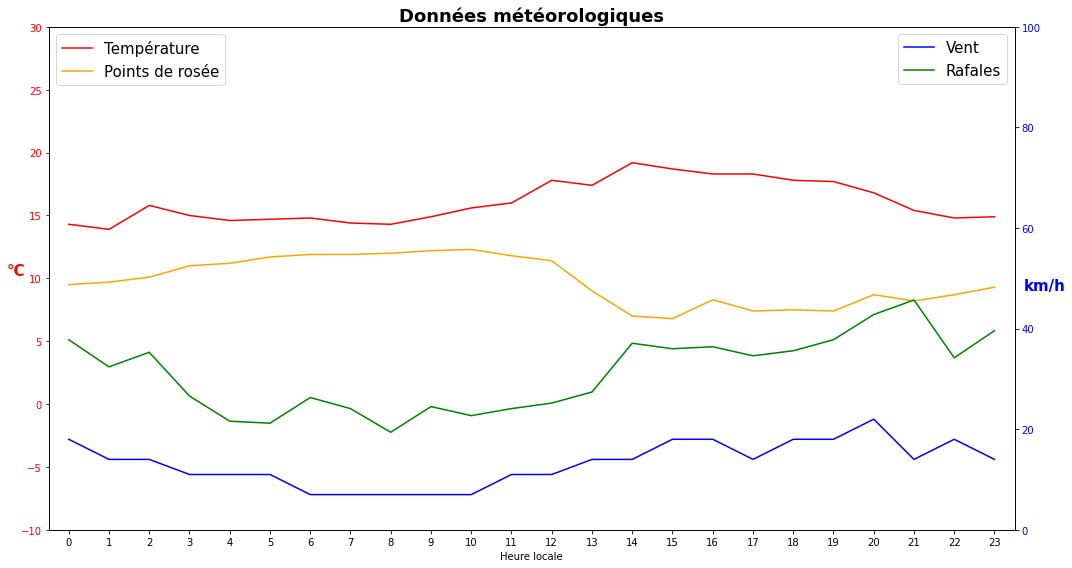

In [70]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()

ax1.set_xlim(-0.5, 23.5)
ax1.set_ylim(-10, 30)
ax2.set_ylim(0, 100)

ax1.set_xlabel("Heure locale")
ax1.set_ylabel("°C", color="red", fontsize=15, fontweight="bold", rotation=0)
ax2.set_ylabel("km/h", color="blue", fontsize=15, fontweight="bold", rotation=0)

ax1.set_xticks(range(24))
ax1.tick_params(axis='y', labelcolor="red")
ax2.tick_params(axis='y', labelcolor="blue")


ax1.plot(df["Heure locale"], df["Température (°C)"], color="red")
ax1.plot(df["Heure locale"], df["Point de rosée (°C)"], color="orange")
ax2.plot(df["Heure locale"], df["Vent (km/h)"], color="blue")
ax2.plot(df["Heure locale"], df["Rafales (km/h)"], color="green")


ax1.legend(["Température", "Points de rosée"], loc="upper left", fontsize=15)
ax2.legend(["Vent", "Rafales"], loc="upper right", fontsize=15)

ax1.set_title("Données météorologiques", fontsize=18, fontweight="bold")
fig.tight_layout()
plt.show()